Text(0, 0.5, 'Flux')

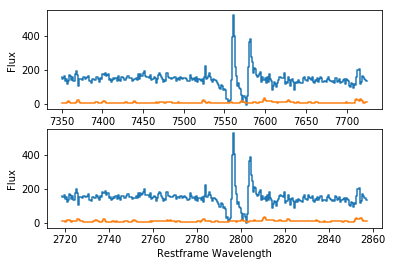

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from musetools import io as io
from musetools import util as u
from musetools import spec as s
%matplotlib inline

import getpass
# TEST BLAH BLAH BLAH

username=getpass.getuser()

if username == 'bordoloi':
	fits_file = '/Users/bordoloi/Dropbox/MUSE/LensedArc/RCS0327_16mc_zap.fits'
else:
	fits_file = '/home/ahmed/astro/data/RCS0327_16mc_zap.fits'



wave, data, var, header = io.open_muse_cube(fits_file)
zgal = 1.7037455
wrest = wave / (1. + zgal)
xcen = 121
ycen = 245

spec, spec_err = s.extract_square(xcen, ycen, wave, data, var, 5)
minindex = 2200
maxindex = 2500
wave   = wave[minindex:maxindex]
wrest  = wrest[minindex:maxindex]
spec   = spec[minindex:maxindex]
spec_err = spec_err[minindex:maxindex]

fig1, axs = plt.subplots(2)
axs[0].step(wave,spec)
axs[0].step(wave,spec_err)
axs[0].set_xlabel('$Wave Length$')
axs[0].set_ylabel('Flux')

axs[1].step(wrest,spec)
axs[1].step(wrest,spec_err)
axs[1].set_xlabel('Restframe Wavelength')
axs[1].set_ylabel('Flux')

Text(0, 0.5, 'Flux')

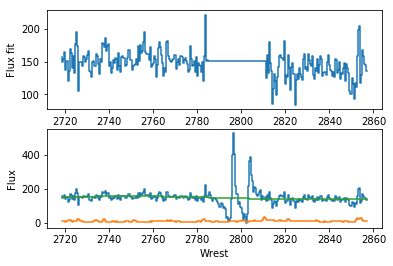

In [2]:
minw = 7530.
maxw = 7600.
q = np.where((wave > minw) & (wave < maxw))
#print(q)
wrest_fit = np.delete(wrest, q)
spec_fit = np.delete(spec, q)
cont = np.poly1d(np.polyfit(wrest_fit, spec_fit, 3))
continuum = cont(wrest)
#print(wrest_fit)
#print(spec_fit)
fig2, axs = plt.subplots(2)
axs[0].step(wrest_fit,spec_fit)
axs[0].set_xlabel('Wrest fit')
axs[0].set_ylabel('Flux fit')

axs[1].step(wrest,spec)
axs[1].step(wrest,spec_err)
axs[1].step(wrest,continuum)
axs[1].set_xlabel('Wrest')
axs[1].set_ylabel('Flux')

2796.351
2803.528


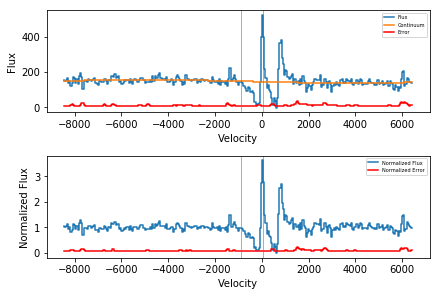

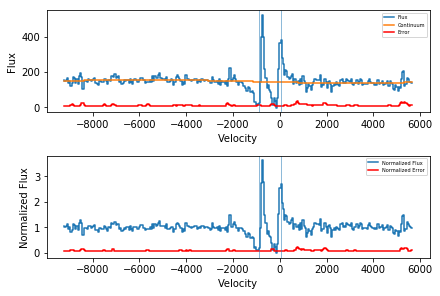

In [3]:
lam_center = [2796.351,2803.528]
for i in lam_center:
    print(i)
    vel = u.veldiff(wrest,i)
    #plot_vel(vel,spec,spec_err,continuum,-900,70)
    #w1 = compute_eqw(i,wrest,spec,continuum,-900,70)
    #print(w1)
    fig, axs = plt.subplots(2, 1, constrained_layout=True)
    start_line = -900
    end_line = 70
    axs[0].step(vel,spec,'-',label='Flux')#,vel,continuum,'--',label='Continuum',vel,spec_err,'r-',label ='Error')
    axs[0].step(vel,continuum,'--',label='Continuum')
    axs[0].step(vel,spec_err,'r-',label='Error')
    axs[0].axvline(x=start_line, linewidth=0.5)
    axs[0].axvline(x=end_line,linewidth = 0.5 )
    axs[0].legend(loc =0,prop={'size': 5})
    axs[0].set_xlabel('Velocity')
    axs[0].set_ylabel('Flux')
    
    flx_norm = spec/continuum
    flx_norm_err = spec_err/continuum
    
    axs[1].step(vel,flx_norm,'-',label='Normalized Flux')#,vel,spec_err/continuum,'r-',label='Normalized Error')
    axs[1].step(vel,flx_norm_err,'r-',label='Normalized Error')
    axs[1].axvline(x=start_line, linewidth = 0.5)
    axs[1].axvline(x=end_line, linewidth = 0.5)
    axs[1].legend(loc=0,prop={'size': 5})
    axs[1].set_xlabel('Velocity')
    axs[1].set_ylabel('Normalized Flux')
    


[[Model]]
    Model(modelMg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 305
    # data points      = 300
    # variables        = 4
    chi-square         = 27.6307409
    reduced chi-square = 0.09334710
    Akaike info crit   = -707.456056
    Bayesian info crit = -692.640926
[[Variables]]
    v1:     -265.408794 +/- 4219.61601 (1589.86%) (init = 0)
    tau1:    38.7888514 +/- 210834.722 (543544.64%) (init = 0.8)
    c1:      0.13275339 +/- 759.817024 (572352.27%) (init = 0.9)
    sigma1:  10.5648105 +/- 10863.9618 (102831.58%) (init = 100)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau1, c1)     = -1.000
    C(tau1, sigma1) = -1.000
    C(c1, sigma1)   =  1.000
    C(v1, c1)       = -1.000
    C(v1, tau1)     =  1.000
    C(v1, sigma1)   = -1.000



Text(0, 0.5, 'Normalized Flux')

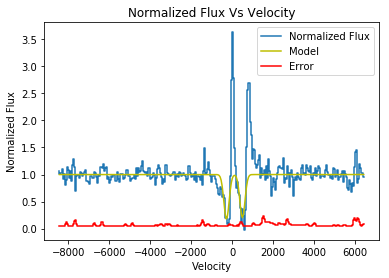

In [4]:
import musetools.modeling as m
from lmfit import Model
vel1 = u.veldiff(wrest,lam_center[0])
gmodel  = Model(m.modelMg)
result = gmodel.fit(flx_norm,v =vel1,v1=0,tau1=0.8, c1=0.9, sigma1=100.)
print(result.fit_report())

fig3, ax = plt.subplots()
ax.step(vel1, flx_norm, label='Normalized Flux')
ax.plot(vel1, result.best_fit,'y-',label='Model')
ax.step(vel1, flx_norm_err,'r',label='Error')
ax.legend(loc=0)
ax.set_title('Normalized Flux Vs Velocity')
ax.set_xlabel('Velocity')
ax.set_ylabel('Normalized Flux')